In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('concrete_data.csv')
ds

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
data=pd.DataFrame(data=ds)

In [4]:
data.shape

(1030, 9)

In [5]:
data.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
data.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [8]:
data.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


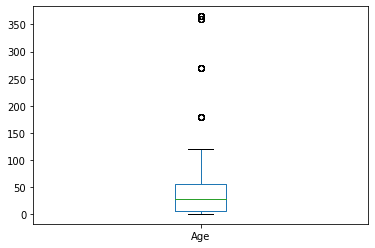

In [9]:
data['Age'].plot.box()

Cement                 AxesSubplot(0.125,0.536818;0.133621x0.343182)
Blast               AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Fly Ash              AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Water               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Superplasticizer    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
CA                        AxesSubplot(0.125,0.125;0.133621x0.343182)
FA                     AxesSubplot(0.285345,0.125;0.133621x0.343182)
Age                     AxesSubplot(0.44569,0.125;0.133621x0.343182)
CMS                    AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

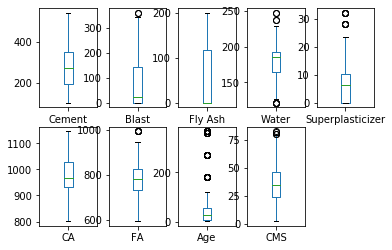

In [10]:
data.plot(kind='box',subplots=True,layout=(2,5))

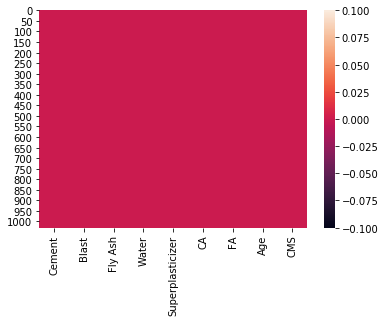

In [11]:
sb.heatmap(data.isnull())

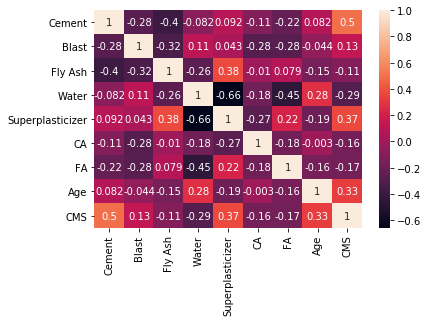

In [12]:
sb.heatmap(data.corr(),annot=True)

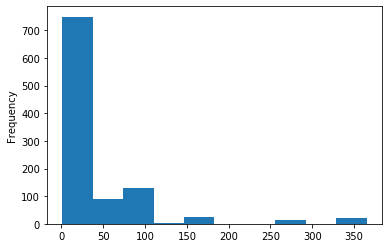

In [13]:
data['Age'].plot.hist()

In [14]:
import numpy as np
data['Age']=np.log(data['Age'])

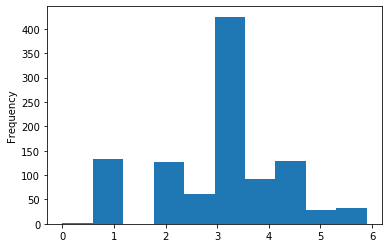

In [15]:
data['Age'].plot.hist()

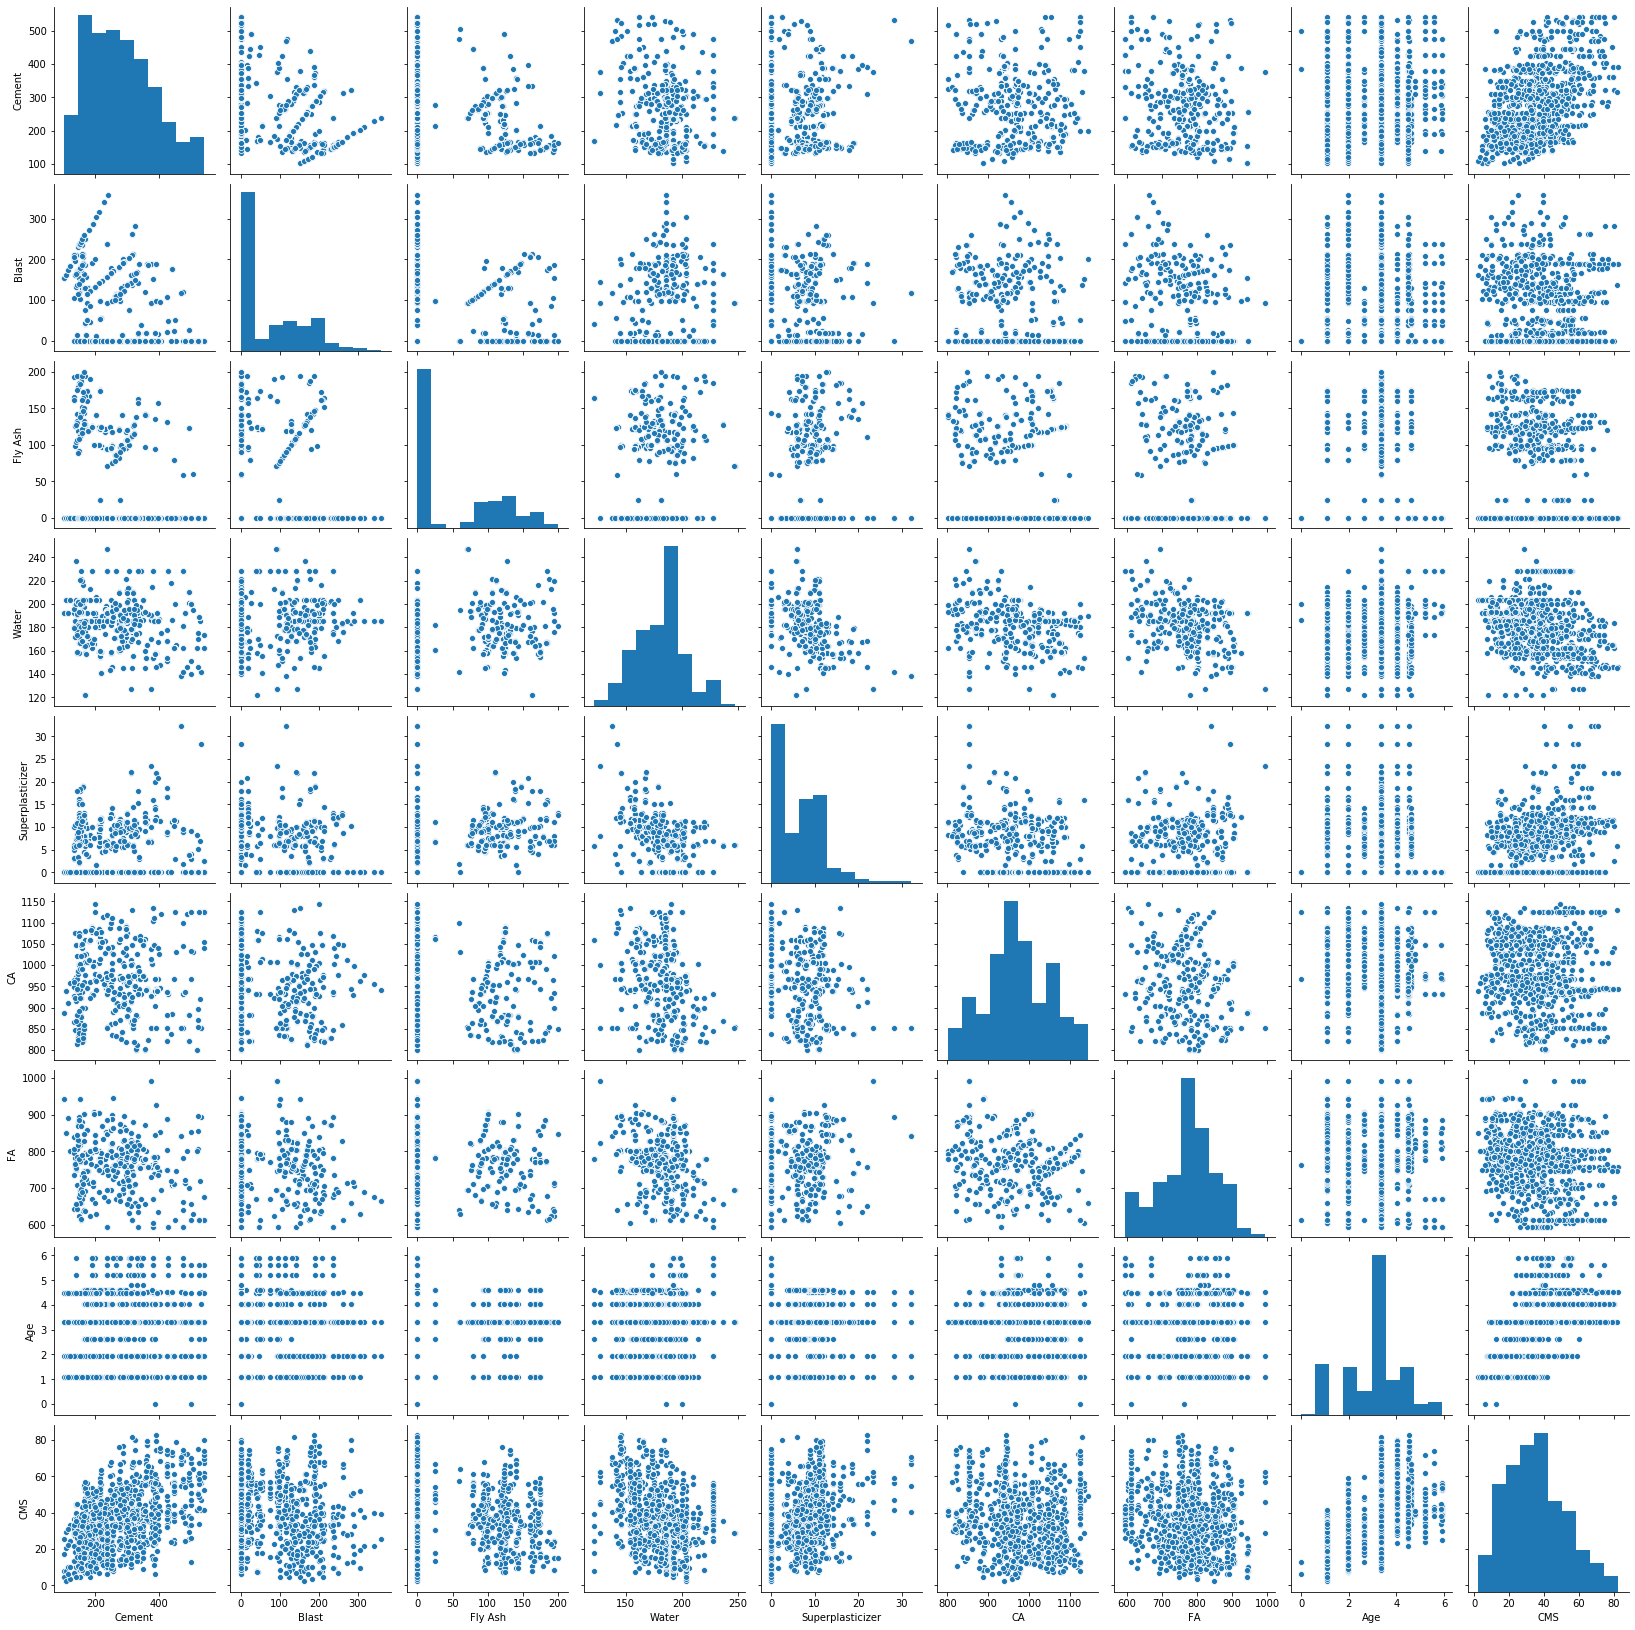

In [16]:
sb.pairplot(data)

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imp=SimpleImputer(missing_values=0,strategy='mean')#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imp=imp.fit(data)
dst=imp.transform(data.values)
dst

array([[540.        , 136.15867621, 120.2887931 , ..., 676.        ,
          3.33220451,  79.99      ],
       [540.        , 136.15867621, 120.2887931 , ..., 676.        ,
          3.33220451,  61.89      ],
       [332.5       , 142.5       , 120.2887931 , ..., 594.        ,
          5.59842196,  40.27      ],
       ...,
       [148.5       , 139.4       , 108.6       , ..., 780.        ,
          3.33220451,  23.7       ],
       [159.1       , 186.7       , 120.2887931 , ..., 788.9       ,
          3.33220451,  32.77      ],
       [260.9       , 100.5       ,  78.3       , ..., 761.5       ,
          3.33220451,  32.4       ]])

In [19]:
dst=pd.DataFrame(dst)
dst

,0,1,2,3,4,5,6,7,8
0,540.0,136.158676,120.288793,162.0,2.500000,1040.0,676.0,3.332205,79.99
1,540.0,136.158676,120.288793,162.0,2.500000,1055.0,676.0,3.332205,61.89
2,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.598422,40.27
3,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.899897,41.05
4,198.6,132.400000,120.288793,192.0,9.816897,978.4,825.5,5.886104,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.300000,179.6,8.900000,870.1,768.3,3.332205,44.28
1026,322.2,136.158676,115.600000,196.0,10.400000,817.9,813.4,3.332205,31.18
1027,148.5,139.400000,108.600000,192.7,6.100000,892.4,780.0,3.332205,23.70
1028,159.1,186.700000,120.288793,175.6,11.300000,989.6,788.9,3.332205,32.77


In [20]:
y=dst.iloc[:,-1]

In [21]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: 8, dtype: float64

In [22]:
y.shape

(1030,)

In [23]:
x=dst.iloc[:,0:8]
x

,0,1,2,3,4,5,6,7
0,540.0,136.158676,120.288793,162.0,2.500000,1040.0,676.0,3.332205
1,540.0,136.158676,120.288793,162.0,2.500000,1055.0,676.0,3.332205
2,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.598422
3,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.899897
4,198.6,132.400000,120.288793,192.0,9.816897,978.4,825.5,5.886104
...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.300000,179.6,8.900000,870.1,768.3,3.332205
1026,322.2,136.158676,115.600000,196.0,10.400000,817.9,813.4,3.332205
1027,148.5,139.400000,108.600000,192.7,6.100000,892.4,780.0,3.332205
1028,159.1,186.700000,120.288793,175.6,11.300000,989.6,788.9,3.332205


In [24]:
x.shape

(1030, 8)

In [25]:
y.shape

(1030,)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [27]:
x_train.shape

(803, 8)

In [28]:
x_test.shape

(227, 8)

In [29]:
y_train.shape

(803,)

In [30]:
y_test.shape

(227,)

In [31]:
lm=LinearRegression()

In [32]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lm.score(x_train,y_train)

0.7764077121055183

In [34]:
lm.coef_

array([ 0.05950414,  0.03516376, -0.09140274, -0.47681791, -0.51941433,
       -0.06334476, -0.06519086,  8.53269588])

In [35]:
lm.intercept_

201.88812910805626

In [36]:
pred=lm.predict(x_test)

In [37]:
print('Predicted value and actual value ',pred,y_test)

Predicted value and actual value  [44.5434864  41.95388399 59.06480636 34.72414903 18.05620088 47.13138749
 31.61705356 53.33510099 34.67075388 50.01778786 36.77818364 17.20718489
 41.09652031 40.97940726 23.21146552 34.94648371 36.68048551 18.94421489
 36.36267491 26.58709444 37.61491496 37.03149377 46.97072247  9.90896801
 33.62583389 38.34050924  9.46375739 45.63277334 44.3382932  13.96332337
 43.41716426 40.05496812 47.90543023 53.606207   13.88831892 32.54784247
 35.35514875 45.72482596 12.34188496 45.77534511 17.380468    0.83046734
 33.32246631 48.66863295  8.6550182  59.8017154  52.5945692  52.91345099
 25.23238618  3.64489757 45.43363109 41.76093134 25.6340246  23.57354618
 55.28021557 34.82873817 28.75633979 12.48413945 35.89305167 23.95138305
 45.85656245 18.64066556 38.57541031 42.98849783 24.2251877  25.87677726
 38.63539021 25.99263129 33.99373645 25.59735193  9.392183   19.53551143
  3.08300263 36.71861586 35.4083559   9.84985734 45.46842087 54.2920227
 59.6195607   7.59

In [38]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(pred,y_test))

52.23561676915724


lets make one test

In [39]:
def predicttest(testvalue):
    testvalue=testvalue.reshape(1,-1)
    t=lm.predict(testvalue)
    print(t)

In [40]:
testv=np.array([540.0,136.158676,120.288793,162.0,2.500000,1040.0,676.0,28.0])
predicttest(testv)

[278.2383615]
